# **Exploratory Analysis**

The purpouse is to explore the votes records of the first turn of Rio de Janeiro 2014 election.

The dataset that will be used is the [Boletim de Urnas available by TSE](http://www.tse.jus.br/eleitor-e-eleicoes/eleicoes/eleicoes-anteriores/eleicoes-2016/votacao-e-resultados/boletim-urna-1-turno).

---

### Objective

The main objective of this project is to identify standards in the votes received by the candidates. For this, it is necessary to verify that the votes on specific candidates are grouped geographically and to identify standards among the candidates.

### Questions of interest

-  Are the candidates' votes aggregated in few ballot boxes?
-  The votes are aggregated regionally?
-  What is the average distribution of votes in an urn?
-  Are there correlations between candidates from different positions in the same ballot boxes?
-  If yes, which are the most correlated candidates?

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from plotly import tools
from plotly import offline
import plotly.plotly as py
import plotly.graph_objs as go

import time
from copy import deepcopy

from IPython.display import Image

offline.init_notebook_mode(connected=True)
%matplotlib inline

from quilt.data.alifersales import rjbu20141

# Data cleanning

In [2]:
#Importing data
full_bu = rjbu20141()
full_bu.head(2)

,data_geracao,hora_geracao,codigo_pleito,codigo_eleicao,sigla_uf,codigo_cargo,descricao_cargo,numero_zona,numero_secao,numero_local,...,numero_votavel,nome_votavel,qtde_votos,codigo_tipo_votavel,numero_urna_efetivada,codigo_carga_urna_1,codigo_carga_urna_2,data_carga_urna,codigo_flashcard,cargo_pergunta_secao
0,14/10/2014,13:55:55,157,143,RJ,1,PRESIDENTE,1,1,1295,...,96,NULO,17,3,1474540,685.479.799.740.465.658.,223.454,22/09/2014,AC0F2D99,1 - 1
1,14/10/2014,13:55:55,157,143,RJ,1,PRESIDENTE,1,1,1295,...,95,BRANCO,9,2,1474540,685.479.799.740.465.658.,223.454,22/09/2014,AC0F2D99,1 - 1


In [14]:
full_bu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5750429 entries, 0 to 5750428
Data columns (total 31 columns):
data_geracao                     object
hora_geracao                     object
codigo_pleito                    int64
codigo_eleicao                   int64
sigla_uf                         object
codigo_cargo                     int64
descricao_cargo                  object
numero_zona                      int64
numero_secao                     int64
numero_local                     int64
numero_partido                   int64
nome_partido                     object
codigo_municipio                 int64
nome_municipio                   object
data_bu_recebido                 object
qtde_eleitores_aptos             int64
qtde_eleitores_faltosos          int64
qtde_eleitores_comparecimento    int64
codigo_tipo_eleicao              int64
codigo_tipo_urna                 int64
descricao_tipo_urna              object
numero_votavel                   int64
nome_votavel         

The types of following columns must be changed:

| column | correct type |
| :---: | :---: |
| `data_geracao` | datetime |
| `hora_geracao` | datetime.time |
| `data_bu_recebido` | datetime |
| `data_carga_urna` | datetime |

The following codes will be used when I will need to change the types.

**OBS:** `data_geracao` and `hora_geracao` can be merged to datetime type.

In [ ]:
full_bu.data_geracao = pd.to_datetime(full_bu.data_geracao,format='%d/%m/%Y')
full_bu.hora_geracao = pd.to_datetime(full_bu.hora_geracao,format='%H:%M:%S')#.dt.time
full_bu.data_bu_recebido = pd.to_datetime(full_bu.data_bu_recebido,format='%d/%m/%Y')
full_bu.data_carga_urna = pd.to_datetime(full_bu.data_carga_urna,format='%d/%m/%Y')

### Columns descriptions

|    column    |     dtype     |     description    |
| --- | --- | --- |
| data_geracao | datetime64[ns] | Data da geração do arquivo. |
| hora_geracao | object *(dt.time)* | Hora da geração do arquivo, no padrão 24 horas |
| codigo_pleito | int64 | Código de Identificação do Pleito. |
| codigo_eleicao | int64 | Código de Identificação da Eleição. |
| sigla_uf | object | Sigla da UF. |
| codigo_cargo | int64 | Código do Cargo do Candidato ou Pergunta no caso de plebiscito. |
| descricao_cargo | object | Descrição do Cargo ou Descrição da pergunta, no caso de plebiscito. |
| numero_zona | int64 | Número da Zona Eleitoral. |
| numero_secao | int64 | Número da Seção Eleitoral. |
| numero_local | int64 | Número do local de votação referente ao Boletim de Urna. |
| numero_partido | int64 | Número de identificação do partido junto ao TSE. |
| nome_partido | object | Nome do partido junto ao TSE. |
| codigo_municipio | int64 | Código do Município junto ao TSE. |
| nome_municipio | object | Nome do Município |
| data_bu_recebido | datetime64[ns] | Data do BU Recebido |
| qtde_eleitores_aptos | int64 | Quantidade de Eleitores Aptos |
| qtde_eleitores_faltosos | int64 | Quantidade de eleitores que Faltaram |
| qtde_eleitores_comparecimento | int64 | Quantidade de Eleitores que compareceram |
| codigo_tipo_eleicao | int64 | Código de identificação do tipo da Eleição |
| codigo_tipo_urna | int64 | Código de identificação do tipo de Urna |
| descricao_tipo_urna | object | Descrição do Tipo de Urna |
| numero_votavel | int64 | Número do Votável |
| nome_votavel | object | Nome do Votável |
| qtde_votos | int64 | Quantidade de Votos |
| codigo_tipo_votavel | int64 | Código do Tipo do Votável |
| numero_urna_efetivada | int64 | Número de Urna Efetivada |
| codigo_carga_urna_1 | object | Código da Carga de Urna 1a Efetivada |
| codigo_carga_urna_2 | float64 | Código da Carga de Urna 2a Efetivada |
| data_carga_urna | datetime64[ns] | Data da Carga de Urna Efetivada |
| codigo_flashcard | object | Código do Flashcard de Urna Efetivada |
| cargo_pergunta_secao | object | Código do Cargo / Pergunta / Seção, casoum dos valores seja nulo, deverá retornar “-“. |

The data looks ok. :D

# Variables analysis

As dataset is very large, I will select only the columns that 
interest to me.


The criterions used was **discard** columns that:
- have only a unique value: 
  - `codigo_pleito`, 
  - `codigo_eleicao`, 
  - `sigla_uf`, 
  - `data_bu_recebido`,
  - `codigo_tipo_urna`, and 
  - `descricao_tipo_urna`
- contain tecnical informations: 
  - `data_geracao`, 
  - `hora_geracao`, 
  - `codigo_tipo_votavel`,
  - `numero_urna_efetivada`,
  - `codigo_carga_urna_1`,
  - `codigo_carga_urna_2`, 
  - `data_carga_urna`,
  - `codigo_flashcard` and 
  - `cargo_pergunta_secao`
- already been represented by anothers columns: 
 - `descricao_cargo`, 
 - `nome_partido`, 
 - `nome_municipio`,
 - `codigo_tipo_eleicao`, and 
 - `nome_votavel`

Finally, I can work with the followings variables (all are *int* type):


|    variables    |     type    |    description     |
| --- | --- | --- |
| codigo_cargo | categorical, nominal |Código do Cargo do Candidato ou Pergunta no caso de plebiscito. |
| numero_zona | categorical, nominal | Número da Zona Eleitoral. |
| numero_secao | categorical, nominal | Número da Seção Eleitoral. |
| numero_local | categorical, nominal | Número do local de votação referente ao Boletim de Urna. |
| numero_partido | categorical, nominal | Número de identificação do partido junto ao TSE. |
| codigo_municipio | categorical, nominal | Código do Município junto ao TSE. |
| qtde_eleitores_aptos | quantitative | Quantidade de Eleitores Aptos |
| qtde_eleitores_faltosos | quantitative | Quantidade de eleitores que Faltaram |
| qtde_eleitores_comparecimento | quantitative | Quantidade de Eleitores que compareceram |
| numero_votavel | categorical, nominal | Número do Votável |
| qtde_votos | quantitative | Quantidade de Votos |

In [10]:
columns = [
    'codigo_cargo','numero_zona','numero_secao','numero_local',
    'numero_partido','codigo_municipio','qtde_eleitores_aptos',
    'qtde_eleitores_faltosos','qtde_eleitores_comparecimento',
    'numero_votavel','qtde_votos'
]
bu2014 = full_bu[columns]
bu2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5750429 entries, 0 to 5750428
Data columns (total 11 columns):
codigo_cargo                     int64
numero_zona                      int64
numero_secao                     int64
numero_local                     int64
numero_partido                   int64
codigo_municipio                 int64
qtde_eleitores_aptos             int64
qtde_eleitores_faltosos          int64
qtde_eleitores_comparecimento    int64
numero_votavel                   int64
qtde_votos                       int64
dtypes: int64(11)
memory usage: 526.5 MB


Each row of the data frame refers to the votes on a specific candidate on a specific ballot box. It's a very important information, because it can create some confusion. Per exemple, the columns `qtde_eleitores_aptos`, `qtde_eleitores_faltosos` and  `qtde_eleitores_comparecimento` refer to all ballot box's votes, but not to a specific candidate's votes on the ballot box.

A specific ballot box is identified by combination of columns `numero_zona` and `numero_secao`. Let's analyse one ballot box to verify the problem previously mentioned.

In [11]:
box_2_296 = bu2014[(bu2014.numero_zona == 2) & (bu2014.numero_secao == 296)]
box_2_296 = box_2_296[[
    'codigo_cargo',
    'qtde_eleitores_aptos', 
    'qtde_eleitores_faltosos',
    'qtde_eleitores_comparecimento',
    'qtde_votos'
]]

box_2_296.groupby([
    'codigo_cargo',
    'qtde_eleitores_aptos', 
    'qtde_eleitores_faltosos',
    'qtde_eleitores_comparecimento'
]).sum()

,,,,qtde_votos
codigo_cargo,qtde_eleitores_aptos,qtde_eleitores_faltosos,qtde_eleitores_comparecimento,
1,420,54,366,366
3,420,54,366,366
5,420,54,366,366
6,420,54,366,366
7,420,54,366,366


As I expected:
- The are only one value in each of three columns, 
- The sum `qtd_eleitores_faltosos` + `qtd_eleitores_comparecimento` = `qtd_eleitores_aptos` is true, and
- For each electoral post, the sum of candidates votes is equal to present voters quantity.

It's possible change the zone and section to verify anothers ballot boxes.

<br>

---
<br>

Now, I want to verify the distribution of the qualified, present and absent voters. We also can analyse the percentage of present and absent electors, creating new columns `percent_comparecimento` and `percent_faltosos`.

Let's also define the column `percent_votos_urna` with the percentage of the candidates' votes in each ballot box.

Finally, we'll create the column `total_votos_candidato`, with the total of candidate votes and, thus we'll create the `percent_votos_candidato` column which will contain, for each candidate, the percentage of votes, of the total votes that the candidate has, came from the specific ballot box.

In [12]:
# Creating the new columns

bu2014['percent_comparecimento'] = bu2014['qtde_eleitores_comparecimento']/bu2014['qtde_eleitores_aptos']
bu2014['percent_faltosos'] = bu2014['qtde_eleitores_faltosos']/bu2014['qtde_eleitores_aptos']
bu2014['percent_votos_urna'] = bu2014['qtde_votos']/bu2014['qtde_eleitores_aptos']

total_votes_candidates = bu2014[
    ['codigo_cargo','numero_votavel','qtde_votos']
].groupby(['codigo_cargo','numero_votavel']).sum().reset_index()

total_votes_candidates.columns = [
    'codigo_cargo', 'numero_votavel', 'total_votos_candidato'
]

bu2014 = bu2014.merge(
    total_votes_candidates,
    how='left',
    left_on=['codigo_cargo','numero_votavel'],
    right_on=['codigo_cargo','numero_votavel']
)

bu2014['percent_votos_candidato'] = bu2014['qtde_votos']/bu2014['total_votos_candidato']

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-ve

       qtde_eleitores_aptos  qtde_eleitores_faltosos  \
count          32692.000000             32692.000000   
mean             371.403799                74.683470   
std               75.895990                25.580792   
min               50.000000                 4.000000   
25%              331.000000                57.000000   
50%              381.000000                73.000000   
75%              401.000000                92.000000   
max              602.000000               238.000000   

       qtde_eleitores_comparecimento  
count                   32692.000000  
mean                      296.720329  
std                        63.431716  
min                        38.000000  
25%                       260.000000  
50%                       302.000000  
75%                       335.000000  
max                       538.000000  


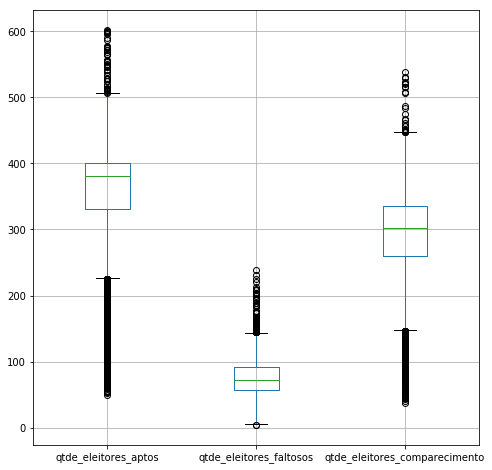

In [13]:
voters_quantities = bu2014\
  .drop_duplicates(['numero_zona','numero_secao'])[[
      'qtde_eleitores_aptos',
      'qtde_eleitores_faltosos',
      'qtde_eleitores_comparecimento'
  ]]

print(voters_quantities.describe())

pd.plotting.boxplot(voters_quantities, figsize=(8,8))

       percent_faltosos  percent_comparecimento
count      32692.000000            32692.000000
mean           0.200610                0.799390
std            0.055236                0.055236
min            0.036810                0.406484
25%            0.157895                0.760903
50%            0.198157                0.801843
75%            0.239097                0.842105
max            0.593516                0.963190


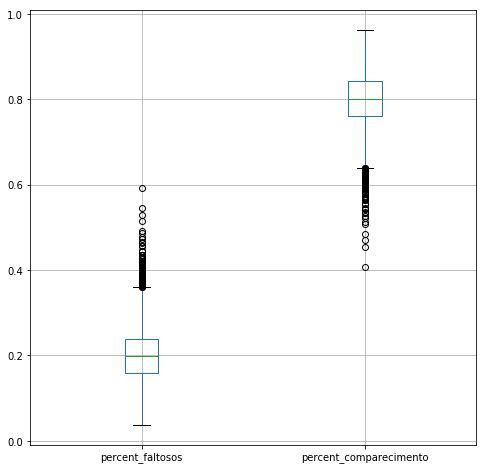

In [14]:
voters_percents = bu2014\
  .drop_duplicates(['numero_zona','numero_secao'])[[
      'percent_faltosos',
      'percent_comparecimento'
  ]]

print(voters_percents.describe())

pd.plotting.boxplot(voters_percents, figsize=(8,8))

The ballot boxes have differents patters of qualified and effective voters. This means that the ballot boxes have differents electors, and of theses, different numbers of present voters. Futhermore, a ballot box has, on avarage, 20% of voters with standard deviation equal to 5,5%.  

# Questions of interest

In [15]:
bu2014 = burj20141_processed()

### Are the candidates' votes aggregated in few ballot boxes?

We are interesed on the distribution of candidates' votes in the ballot boxes. We want to know if, in general, the most part of candidate's votes are from few ballot boxes.

The position id | position table is:

codigo_cargo | descricao_cargo
---|---
1	| PRESIDENTE	 
3	| GOVERNADOR	 
5	| SENADOR	
6	| DEPUTADO FEDERAL	 
7	| DEPUTADO ESTADUAL

In [16]:
def plot_votes_distribution(df, position, n_candidates=None, 
                            fixed_candidates=[], title="",zoom=32692, filename=None):
    
    all_candidates = df[df.codigo_cargo == position]
    all_candidates = list(all_candidates.numero_votavel.unique())

    if n_candidates == None:
        n_candidates = len(all_candidates)

    n_candidates -= len(fixed_candidates)
    [all_candidates.remove(i) for i in fixed_candidates]

    candidates = list(np.random.choice(
      all_candidates,
      min(len(all_candidates),n_candidates),
      replace=False
    ))
    candidates.extend(fixed_candidates)

    fig = tools.make_subplots(
      rows=len(candidates), 
      cols=1,
      print_grid=False
    )

    i = 1
    for candidate in candidates:

        a = list(df[
            (df.codigo_cargo == position) & 
            (df.numero_votavel == candidate)
        ].percent_votos_candidato)
        a.extend([0 for i in range(0,zoom-len(a))])

        a.sort(reverse=True)

        trace = go.Heatmap(
            z=[a[:zoom]],
            y=['candidade {}'.format(candidate)],
            showscale=False
        )
        
        if i != len(candidates):
            fig['layout']['xaxis{}'.format(i)].update(
                  ticks='',
                  showticklabels=False
            )

        fig.append_trace(trace, i, 1)
        i += 1

    fig['layout'].update(
      title=title
    )
    return offline.iplot(fig)

### EXPLAINING THE CHARTS BELOW

The following charts will answer our question. For each position, we select some candidates randomly and plot a heatmap with the percentage of candidates' votes by ballot boxes. Thus, the y-axes refers to candidates, the x-axis refers to ballot boxes and the colors indicate the percentagen of the candidate's votes in the ballot box.

In order to make the information more easily readable, for each candidate I sorted the ballot boxes by the percentage of the candidates' votes in descending order. **\It means that the x-axes is different for each candidate (for each y)**.

To answer the question, there two interpretations of the charts:


- Considering one bar (heatmap of one candidate), the more left the color change, the greater the concentration of votes in few ballot boxes.
- Considering one bar, if the color changes smoothly, then it means that the concentration of votes is decreasing smoothly.

Let's go!

**obs**: To work around `request entity too large` error, I saved as images the result of the following plot_votes_distribution calls, and then I plot it.

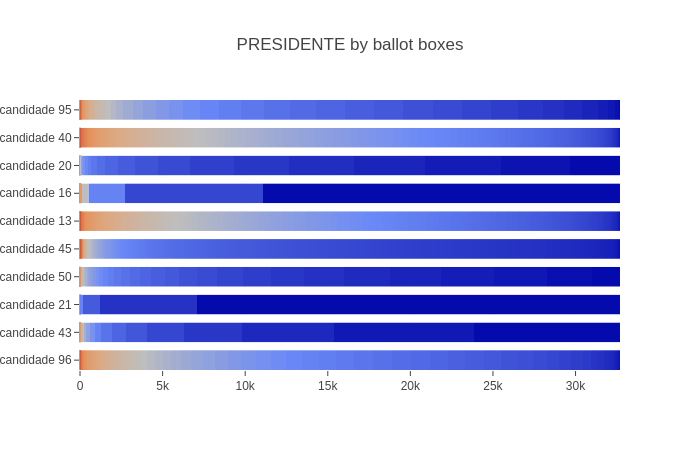

In [17]:
#plot_votes_distribution(bu2014,1,10,title="PRESIDENTE by ballot boxes")
Image('img/hm_1_presidente.png')

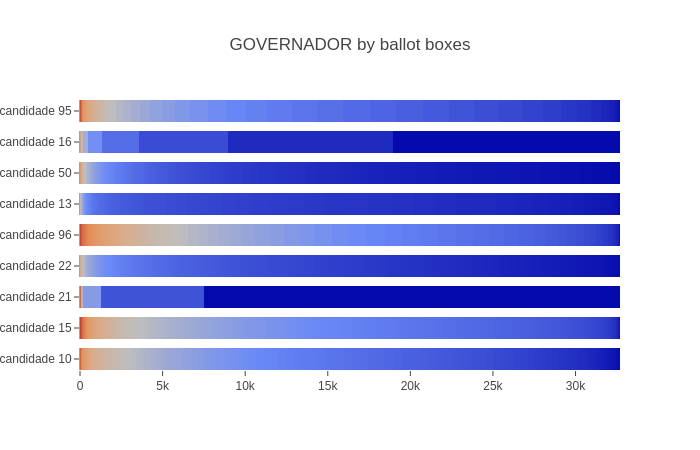

In [18]:
#plot_votes_distribution(bu2014,3,10,title="GOVERNADOR by ballot boxes")
Image('img/hm_1_governador.png')

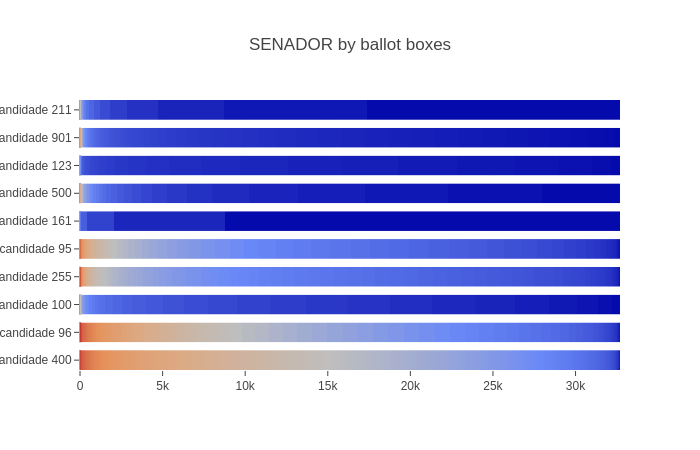

In [19]:
#plot_votes_distribution(bu2014,5,10,title="SENADOR by ballot boxes")
Image('img/hm_1_senador.png')

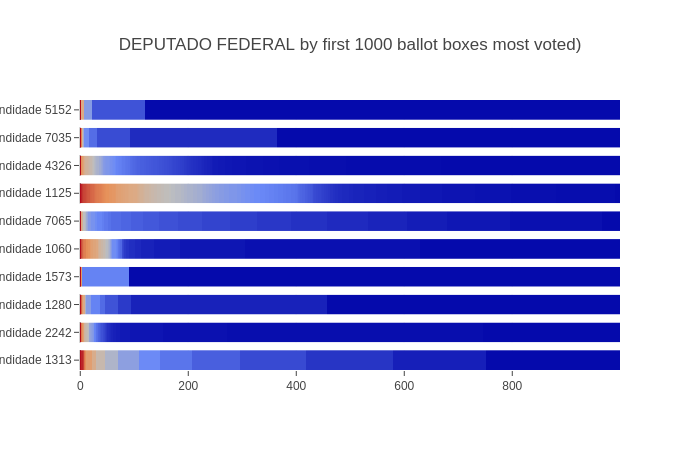

In [20]:
#plot_votes_distribution(bu2014,6,10,[1313],"DEPUTADO FEDERAL by first 1000 ballot boxes most voted)",1000)
Image('img/hm_1_deputado_federal.png')

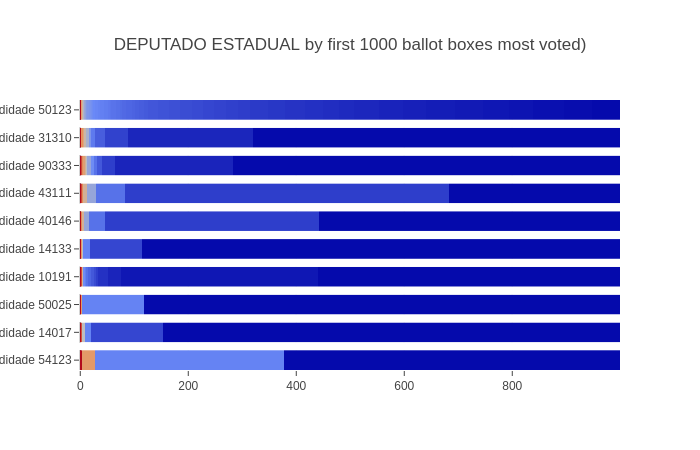

In [21]:
#plot_votes_distribution(bu2014,7,10,title="DEPUTADO ESTADUAL by first 1000 ballot boxes most voted)",zoom=1000)
Image('img/hm_1_deputado_estadual.png')

As we can see, in general, the above heatmaps change fast of color (near to the begin of the bars). This suggest that **the most part of the candidate's votes are aggregated in few ballot boxes**, as we thought.

---

### The candidates's votes are aggregated regionally?

For 'regionally', we can consider the electoral zone, indicated in database by `numero_zona` column. Thus, we can group the data by zones and verify if the candidates' votes are concentred in few zones or not.

In [22]:
zones = bu2014.loc[:,[
    'numero_zona','codigo_cargo','numero_votavel',
    'qtde_votos','total_votos_candidato','percent_votos_candidato'
]]
zones = zones\
        .groupby(['numero_zona','codigo_cargo','numero_votavel','total_votos_candidato'])\
        .sum()\
        .reset_index()
zones.head(2)

,numero_zona,codigo_cargo,numero_votavel,total_votos_candidato,qtde_votos,percent_votos_candidato
0,1,1,13,2971736,7072,0.002380
1,1,1,16,14430,36,0.002495


In [23]:
len(zones.numero_zona.unique())

249

### EXPLAINING THE CHARTS BELOW

The logic of the charts below is the same that we used to answer the previous question. The main diference is that, now, we want analyse the electoral zones votes, instead the ballot boxes votes. 

Again, 
> The charts will answer our question. For each position, we select some candidates randomly and plot a heatmap with the percentage of candidates' votes by *electoral zones*. Thus, the y-axes refers to candidates, the x-axis refers to *zones* and the colors indicate the percentagen of the candidate's votes in the *electoral zone*.
>
>In order to make the information more easily readable, for each candidate I sorted the *electoral zones* by the percentage of the candidates' votes in descending order. **\It means that the x-axes is different for each candidate (for each y)**.
>
>To answer the question, there two interpretations of the charts:
>
> - Considering one bar (heatmap of one candidate), the more left the color change, the greater the concentration of votes in few *electoral zone*.
> - Considering one bar, if the color changes smoothly, then it means that the concentration of votes is decreasing smoothly.

Let's go!

**obs**: To work around `request entity too large` error, I saved as images the result of the following plot_votes_distribution calls, and then I plot it.

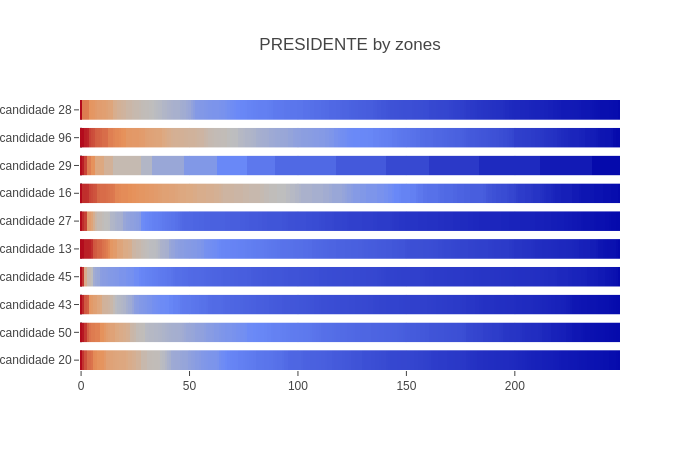

In [33]:
#plot_votes_distribution(zones,1,10,title="PRESIDENTE by zones",zoom=249)
Image('img/hm_2_presidente.png')

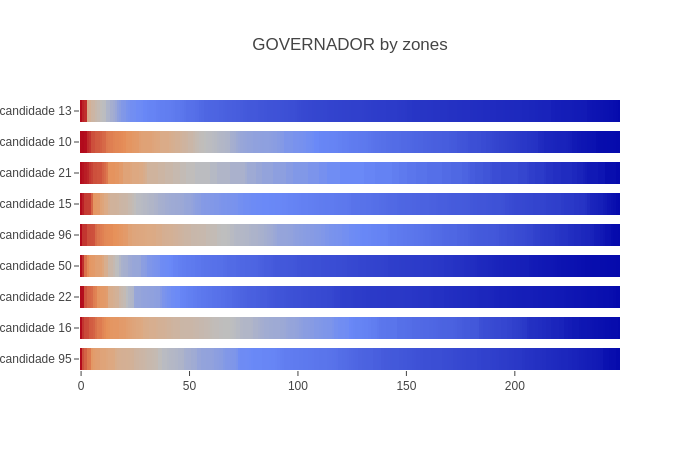

In [34]:
#plot_votes_distribution(zones,3,10,title="GOVERNADOR by zones",zoom=249)
Image('img/hm_2_governador.png')

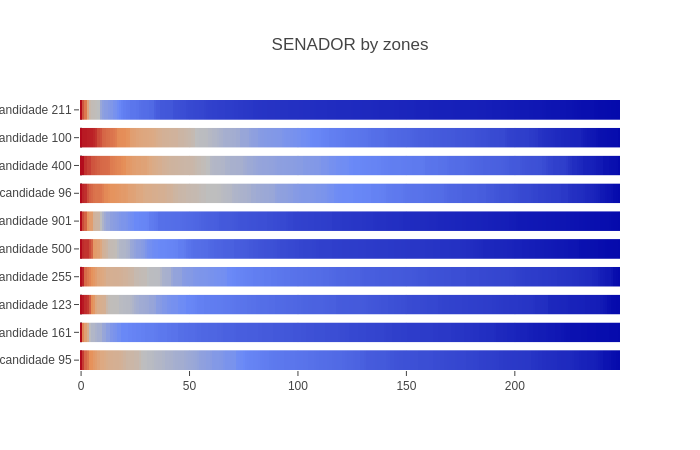

In [35]:
#plot_votes_distribution(zones,5,10,title="SENADOR by zones",zoom=249)
Image('img/hm_2_senador.png')

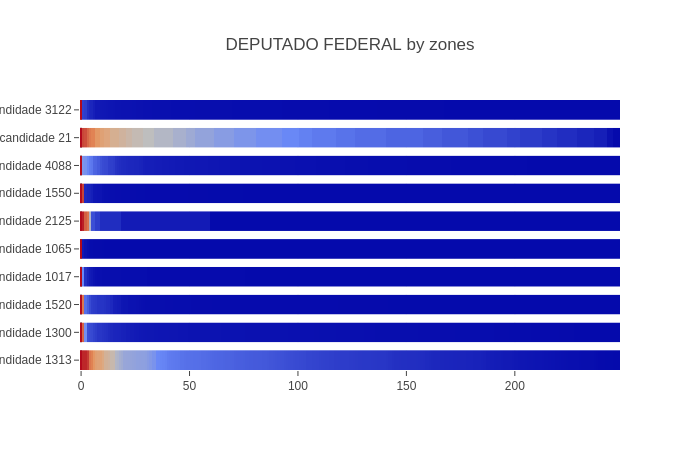

In [36]:
#plot_votes_distribution(zones,6,10,[1313],"DEPUTADO FEDERAL by zones",249)
Image('img/hm_2_deputado_federal.png')

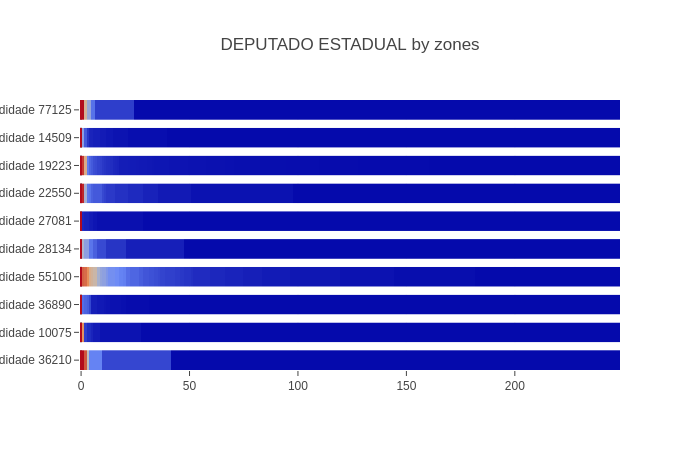

In [37]:
#plot_votes_distribution(zones,7,10,title="DEPUTADO ESTADUAL by zones",zoom=249)
Image('img/hm_2_deputado_estadual.png')

Again, the answer to our question is affirmative. Now, looking by electoral zones, the pattern observed in the previous analysis is maintained and suggests that **the candidates' votes are regionally aggregated**.

---

---

---

## Partial Considerations

This exploratory data analysis was performed by [Alifer Sales](https://github.com/AliferSales), as a work for the Introduction to Data Science course, taught by Prof. Dr. [Renato Rocha Souza](https://github.com/rsouza), at the Escola de Matemática Aplicada of the Fundação Getulio Vargas, in the first semester of 2018.

The main objective was to answer the questions stated at the beginning of the notebook. Unfortunately, it was not possible to complete the analysis within the stipulated time, because of infrastructure problems that delayed the process.

However, it is intended to finalize the analysis, answering the other questions, adjusting details and proceeding to the next steps.

In relation to the methodology used to verify the grouping of votes by ballot boxes and regions, following a suggest from [João Carabetta](https://github.com/joaocarabetta), it is intended to change the metric used for the [Gini Index](http://www.jstor.org/stable/1937992) for candidates' votes.

The next step is to create a metric for the definition of the regions that each ballot box represents, using machine learning algorithms, and, finally, cross the election's votes with demographic and economic data.